In [55]:
import xarray as xr
import rioxarray as rioxr

import os

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [35]:
root = "/media/iiro/T9/finland_climate/fmi_grid_download"

dirs = ['ET0_FAO', 'Globrad', 'Rh', 'RRday', 'Tday', 'Tmin', 'Tmax']

years = (1994, 2023)

for current_dir in dirs:
     
    for year in range(years[0], years[1] + 1):
        # Evapotranspiration has differing scheme to all other sources
        if current_dir == 'ET0_FAO':
            file_name = f"{current_dir}_{year}_months_4_to_9.nc"
        else:
            file_name = f"{current_dir.lower()}_{year}.nc"
        src_path = os.path.join(root, current_dir, file_name)
        
        assert os.path.exists(src_path), f"path {src_path} doesn't exists"

        with rioxr.open_rasterio(src_path, mask=True) as src:
            data_array = src.copy()
        break
    break
    

In [21]:
data_array

<xarray.DataArray 'ET0' (Time: 183, y: 1147, x: 661)> Size: 555MB
[138744561 values with dtype=float32]
Coordinates:
  * x            (x) float64 5kB 7.319e+04 7.419e+04 ... 7.322e+05 7.332e+05
  * y            (y) float64 9kB 7.777e+06 7.776e+06 ... 6.632e+06 6.631e+06
  * Time         (Time) object 1kB 1994-04-01 00:00:00 ... 1994-09-30 00:00:00
    spatial_ref  int64 8B 0
Attributes: (12/23)
    Lat#axis:                Y
    Lat#long_name:           Lat
    Lat#units:               meter
    Lon#axis:                X
    Lon#long_name:           Lon
    Lon#units:               meter
    ...                      ...
    units:                   ('mm', 'mm', 'mm', 'mm', 'mm', 'mm', 'mm', 'mm',...
    min:                     [0.3451702  0.26250353 0.24317771 0.29857895 0.2...
    max:                     [1.98887146 1.40168858 1.36561465 1.65934885 2.2...
    _FillValue:              -3.4e+38
    scale_factor:            1.0
    add_offset:              0.0

In [24]:
data_array.dims

('Time', 'y', 'x')

In [26]:
data_array.argmax('Time')

<xarray.DataArray 'ET0' (y: 1147, x: 661)> Size: 6MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * x            (x) float64 5kB 7.319e+04 7.419e+04 ... 7.322e+05 7.332e+05
  * y            (y) float64 9kB 7.777e+06 7.776e+06 ... 6.632e+06 6.631e+06
    spatial_ref  int64 8B 0

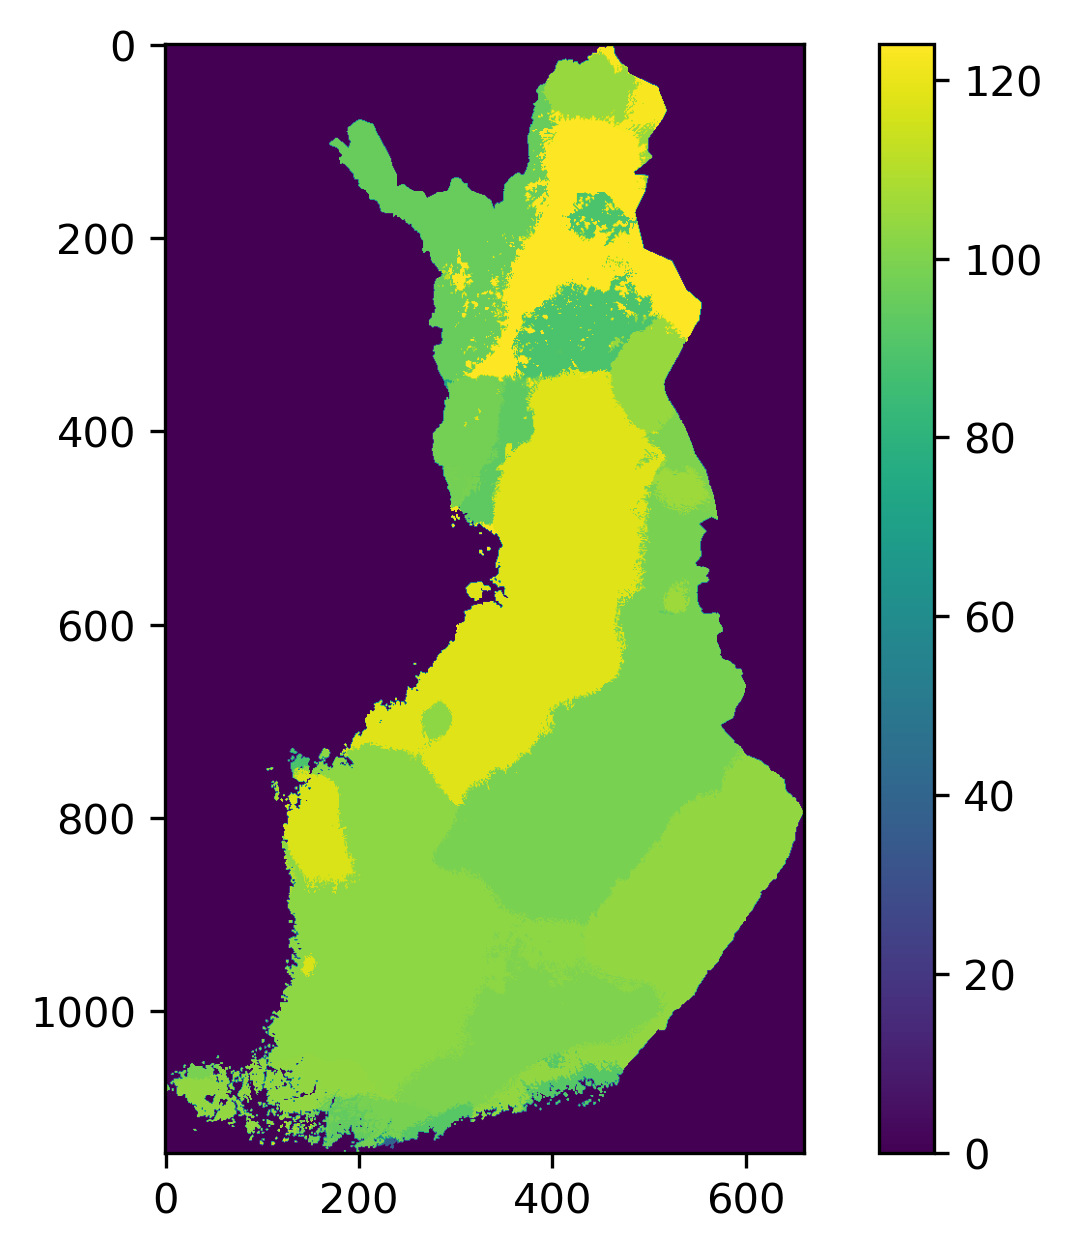

In [36]:
im = plt.imshow(data_array.argmax('Time'))
cbar = plt.colorbar(im)

In [59]:
print(data_array.x.to_numpy().min(), data_array.x.to_numpy().max())

73189.8723 733189.8723
